# Clustering Algorithm

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.metrics import silhouette_score, davies_bouldin_score

In [88]:
df = pd.read_csv('customer_data.csv')
df.head()

,CustomerID,Purchase_Frequency,Spend,Monthly_Visits,Loyalty_Score
0,1,5.993428,55.789308,5,8.485273
1,2,4.723471,44.433809,2,3.457637
2,3,6.295377,66.690239,5,5.662709
3,4,8.046060,83.512448,3,3.688530
4,5,4.531693,45.212425,6,9.466113


In [89]:
## Preprocessing

In [90]:
features = ['Purchase_Frequency','Spend','Monthly_Visits','Loyalty_Score']
x = df[features]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.52707362,  0.31305492,  1.13872582,  1.10285352],
       [-0.1361383 , -0.27020561, -0.55524647, -0.83292549],
       [ 0.68476088,  0.87296714,  1.13872582,  0.01608809],
       ...,
       [ 0.32923692,  0.08001079,  0.57406839, -0.95641775],
       [ 0.85727868,  0.7366241 , -0.55524647, -0.00371577],
       [ 0.66589818,  0.75939379, -1.68456133, -1.41801895]])

## K-Mean Clustering Algorithm

In [91]:
wcss = []
K_range = range(1,11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

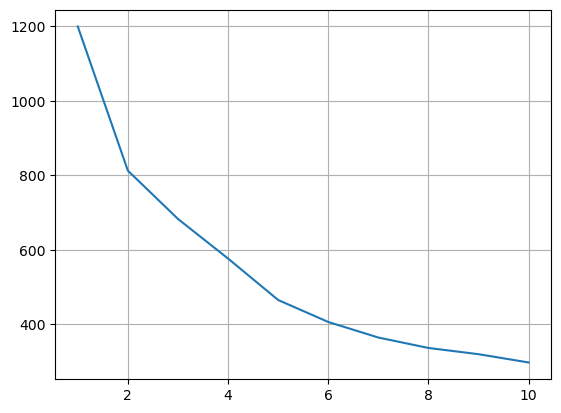

In [92]:
plt.plot(K_range, wcss)
plt.grid(True)
plt.show()

In [93]:
kmeans = KMeans(n_clusters=4, random_state=4)
kmeans_labels = kmeans.fit_predict(x_scaled)
df['KMeans_Cluster'] = kmeans_labels
df.head()

,CustomerID,Purchase_Frequency,Spend,Monthly_Visits,Loyalty_Score,KMeans_Cluster
0,1,5.993428,55.789308,5,8.485273,0
1,2,4.723471,44.433809,2,3.457637,3
2,3,6.295377,66.690239,5,5.662709,0
3,4,8.046060,83.512448,3,3.688530,1
4,5,4.531693,45.212425,6,9.466113,2


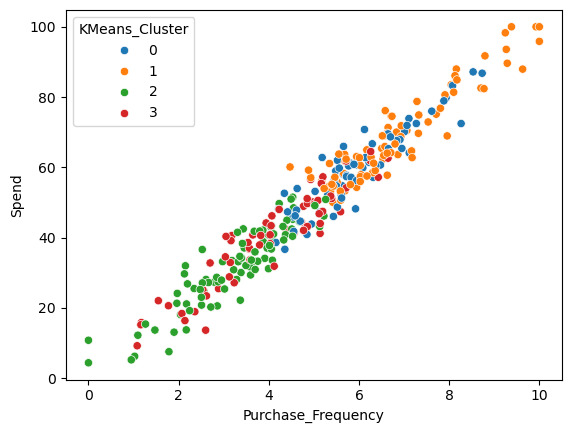

In [94]:
sns.scatterplot(x='Purchase_Frequency', y = 'Spend', hue = 'KMeans_Cluster',data=df, palette='tab10')
plt.show()

## Hierarchical Clustering

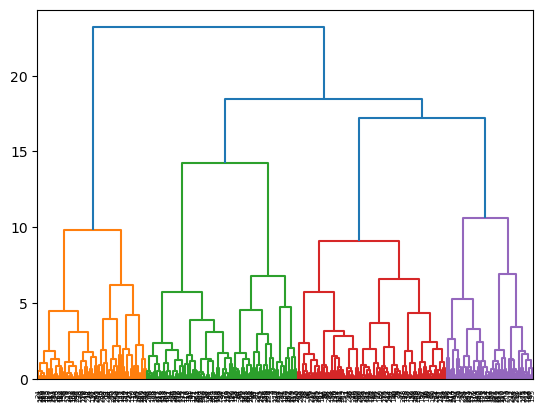

In [95]:
linked = linkage(x_scaled, method = 'ward')
dendrogram(linked)
plt.show()

In [96]:
agg = AgglomerativeClustering(n_clusters=4)
agg_labels = agg.fit_predict(x_scaled)
df['HirarchialCluster'] = agg_labels
df.head()

,CustomerID,Purchase_Frequency,Spend,Monthly_Visits,Loyalty_Score,KMeans_Cluster,HirarchialCluster
0,1,5.993428,55.789308,5,8.485273,0,2
1,2,4.723471,44.433809,2,3.457637,3,3
2,3,6.295377,66.690239,5,5.662709,0,2
3,4,8.046060,83.512448,3,3.688530,1,0
4,5,4.531693,45.212425,6,9.466113,2,2


## GMM Clustering

In [97]:
gmm = GaussianMixture(n_components=4, random_state=4)
gmm_labels = gmm.fit_predict(x_scaled)
df['GMM_Cluster'] = gmm_labels
df.head()

,CustomerID,Purchase_Frequency,Spend,Monthly_Visits,Loyalty_Score,KMeans_Cluster,HirarchialCluster,GMM_Cluster
0,1,5.993428,55.789308,5,8.485273,0,2,2
1,2,4.723471,44.433809,2,3.457637,3,3,0
2,3,6.295377,66.690239,5,5.662709,0,2,0
3,4,8.046060,83.512448,3,3.688530,1,0,1
4,5,4.531693,45.212425,6,9.466113,2,2,2


## Silhouette Score

In [98]:
print('KMeans:',silhouette_score(x_scaled, kmeans_labels))
print('Hirarchial:', silhouette_score(x_scaled, agg_labels))
print('GMM:', silhouette_score(x_scaled, gmm_labels))

KMeans: 0.26460643837241205
Hirarchial: 0.2164449289918176
GMM: 0.10669363681740933


# Davies_Bouldin Scores

In [99]:
print('KMeans:',davies_bouldin_score(x_scaled, kmeans_labels))
print('Hirarchial:', davies_bouldin_score(x_scaled, agg_labels))
print('GMM:', davies_bouldin_score(x_scaled, gmm_labels))

KMeans: 1.2262345892355704
Hirarchial: 1.3173511701168843
GMM: 1.8429601905350572


## DB Scan Algorithm

In [100]:
from sklearn.cluster import DBSCAN

In [101]:
dbs = DBSCAN(eps=1.0, min_samples=5)
dbs_labels = dbs.fit_predict(x_scaled)
df['DBS_Cluster'] = dbs_labels
df.head()

,CustomerID,Purchase_Frequency,Spend,Monthly_Visits,Loyalty_Score,KMeans_Cluster,HirarchialCluster,GMM_Cluster,DBS_Cluster
0,1,5.993428,55.789308,5,8.485273,0,2,2,0
1,2,4.723471,44.433809,2,3.457637,3,3,0,0
2,3,6.295377,66.690239,5,5.662709,0,2,0,0
3,4,8.046060,83.512448,3,3.688530,1,0,1,0
4,5,4.531693,45.212425,6,9.466113,2,2,2,0


In [102]:
dbs_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [103]:
print('KMeans:',davies_bouldin_score(x_scaled, kmeans_labels))
print('Hirarchial:', davies_bouldin_score(x_scaled, agg_labels))
print('GMM:', davies_bouldin_score(x_scaled, gmm_labels))

KMeans: 1.2262345892355704
Hirarchial: 1.3173511701168843
GMM: 1.8429601905350572


In [104]:
print('KMeans:',davies_bouldin_score(x_scaled, kmeans_labels))
print('Hirarchial:', davies_bouldin_score(x_scaled, agg_labels))
print('GMM:', davies_bouldin_score(x_scaled, gmm_labels))

KMeans: 1.2262345892355704
Hirarchial: 1.3173511701168843
GMM: 1.8429601905350572


In [105]:
print('KMeans:',davies_bouldin_score(x_scaled, kmeans_labels))
print('Hirarchial:', davies_bouldin_score(x_scaled, agg_labels))
print('GMM:', davies_bouldin_score(x_scaled, gmm_labels))

KMeans: 1.2262345892355704
Hirarchial: 1.3173511701168843
GMM: 1.8429601905350572


In [108]:
print('KMeans:',davies_bouldin_score(x_scaled, kmeans_labels))
print('Hirarchial:', davies_bouldin_score(x_scaled, agg_labels))
print('GMM:', davies_bouldin_score(x_scaled, gmm_labels))
print('DBS:', silhouette_score(x_scaled, dbs_labels))

KMeans: 1.2262345892355704
Hirarchial: 1.3173511701168843
GMM: 1.8429601905350572
DBS: 0.3153413950783739
